# **A10 - Association Rule Mining**
Mitch Messier, October 26, 2023

# Table of Contents

1. **Task 1:** Set up, Data import, and Preparation
2. **Task 2:** Length, first entry, 10-15 entries, and flattened list
3. **Task 3:** Apriori to show 10-15 items
4. **Task 4:** Apriori to show 3-5 items
5. **Task 5:** Apriori to show 1-2 items

#**Task 1:** Set up, Data import, and Preparation

In [ ]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5955 sha256=f238009fa7269c75226a07027c89c1c3078887310390905619aea533b2dc1076
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [ ]:
import csv
import matplotlib.pyplot as plt
from apyori import apriori
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!wget "https://raw.githubusercontent.com/matthewpecsok/4482_fall_2022/main/data/Walmart_baskets_1week_lst-1.csv"

--2023-11-19 23:11:52--  https://raw.githubusercontent.com/matthewpecsok/4482_fall_2022/main/data/Walmart_baskets_1week_lst-1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96621 (94K) [text/plain]
Saving to: ‘Walmart_baskets_1week_lst-1.csv’

Walmart_baskets_1we 100%[===================>]  94.36K  --.-KB/s    in 0.02s   

2023-11-19 23:11:52 (3.98 MB/s) - ‘Walmart_baskets_1week_lst-1.csv’ saved [96621/96621]



In [ ]:
with open('Walmart_baskets_1week_lst-1.csv', newline='') as f:
    reader = csv.reader(f)
    walmart_baskets = list(reader)

# **Task 2:** Length, first entry, 10-15 entries, and flattened list

In [ ]:
len(walmart_baskets)

2000

In [ ]:
walmart_baskets[0]

['FABRICS AND CRAFTS']

In [ ]:
walmart_baskets[9:15]

[['FINANCIAL SERVICES', 'IMPULSE MERCHANDISE'],
 ['BRAS & SHAPEWEAR', 'PHARMACY OTC'],
 ['JEWELRY AND SUNGLASSES'],
 ['CANDY', ' TOBACCO', ' COOKIES', 'DSD GROCERY'],
 ['SHOES'],
 ['FINANCIAL SERVICES']]

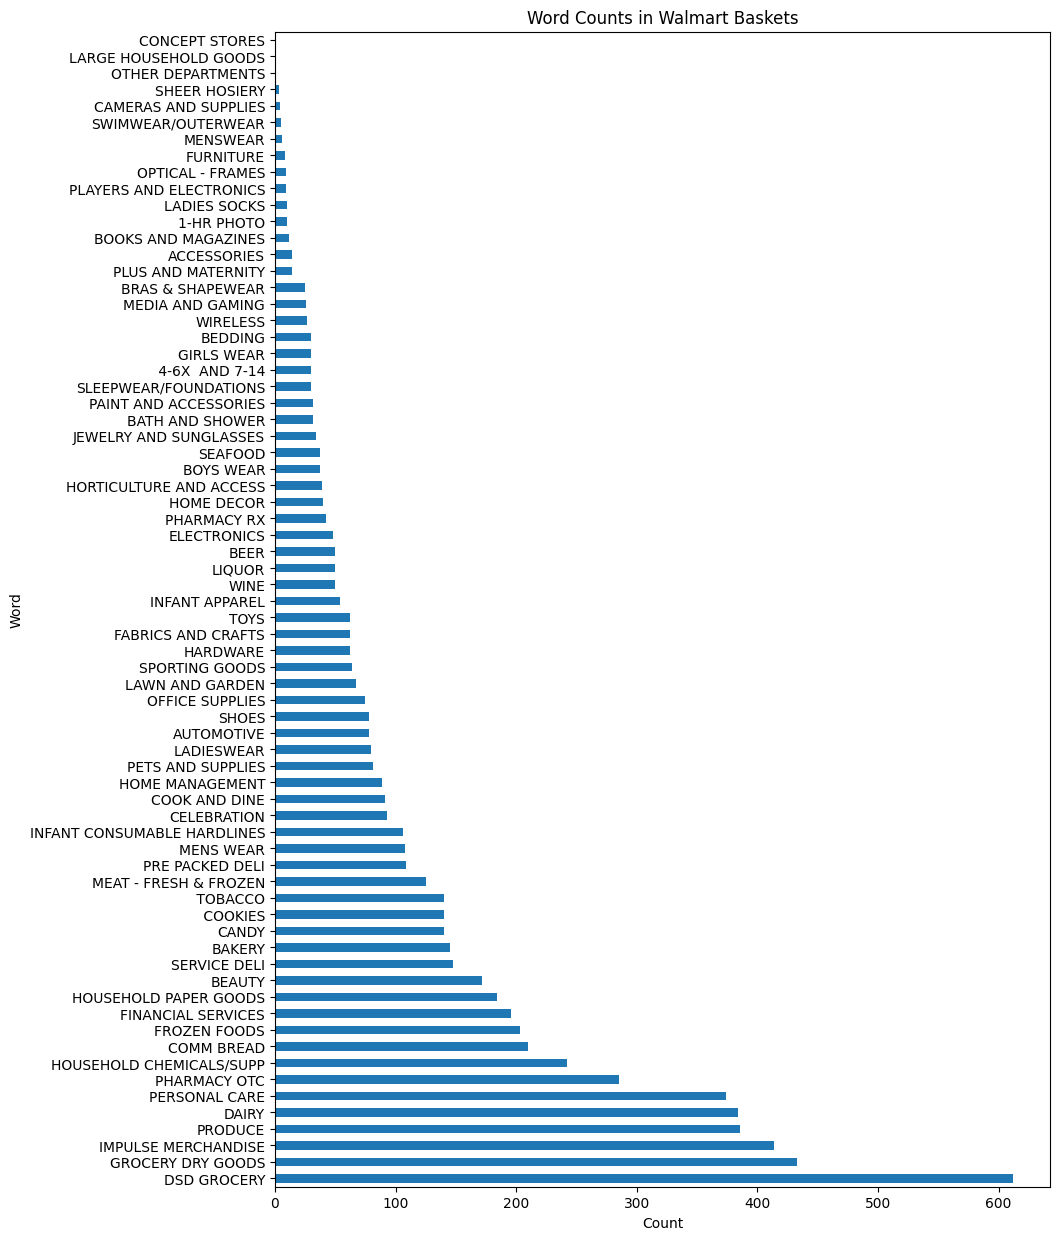

In [ ]:
flattened_list = [item for sublist in walmart_baskets for item in sublist]

word_counts = pd.get_dummies(flattened_list).sum()

word_counts.sort_values(ascending=False).plot(kind='barh', figsize=(10, 15))
plt.title('Word Counts in Walmart Baskets')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

# **Task 3:** Apriori to show 10-15 items

In [ ]:
basket_list = [list(filter(None, basket)) for basket in walmart_baskets]

confidence_values = [0.5]
support_values = [0.02]
lift_values = [2.0]

desired_rules_count = 15

for confidence in confidence_values:
    for support in support_values:
        for lift in lift_values:
            rules = apriori(basket_list, min_support=support, min_confidence=confidence, min_lift=lift)
            results = list(rules)

filtered_results = [result for result in results if len(result.items) <= 2][:desired_rules_count]

def parse_results(results):
    for result in results:
        items = [item for item in result.items]
        print(f"Items: {items}")
        print(f"Support: {result.support}")
        print(f"Confidence: {result.ordered_statistics[0].confidence}")
        print(f"Lift: {result.ordered_statistics[0].lift}")
        print("----")

parse_results(filtered_results)

Items: [' COOKIES', ' TOBACCO']
Support: 0.07
Confidence: 1.0
Lift: 14.285714285714285
----
Items: ['CANDY', ' COOKIES']
Support: 0.07
Confidence: 1.0
Lift: 14.285714285714285
----
Items: [' COOKIES', 'DSD GROCERY']
Support: 0.043
Confidence: 0.6142857142857142
Lift: 2.007469654528478
----
Items: ['CANDY', ' TOBACCO']
Support: 0.07
Confidence: 1.0
Lift: 14.285714285714285
----
Items: [' TOBACCO', 'DSD GROCERY']
Support: 0.043
Confidence: 0.6142857142857142
Lift: 2.007469654528478
----
Items: ['GROCERY DRY GOODS', 'BAKERY']
Support: 0.0395
Confidence: 0.5448275862068966
Lift: 2.516524647606913
----
Items: ['BEAUTY', 'PERSONAL CARE']
Support: 0.046
Confidence: 0.5348837209302326
Lift: 2.8603407536376078
----
Items: ['LIQUOR', 'BEER']
Support: 0.025
Confidence: 1.0
Lift: 40.0
----
Items: ['WINE', 'BEER']
Support: 0.025
Confidence: 1.0
Lift: 40.0
----
Items: ['CANDY', 'DSD GROCERY']
Support: 0.043
Confidence: 0.6142857142857142
Lift: 2.007469654528478
----
Items: ['COMM BREAD', 'DAIRY']
Su

The results indicate several interesting patterns in customer purchasing behavior. Notably, certain item pairs, such as 'COOKIES' and 'TOBACCO,' 'CANDY' and 'COOKIES,' and 'LIQUOR' and 'BEER,' have high confidence values of 1.0, suggesting a strong association between these items. The lift values, especially for 'LIQUOR' and 'BEER' with a lift of 40.0, signify a significant increase in the likelihood of purchasing one item when the other is bought. Additionally, common food pairings, like 'COMM BREAD' with 'DAIRY,' 'DSD GROCERY,' and 'GROCERY DRY GOODS,' demonstrate a consistent trend of customers combining staple food items. Overall, the analysis underscores the importance of understanding customer preferences and tendencies in product co-purchases, which can inform strategic product placement and marketing strategies to enhance the shopping experience.

# **Task 4:** Apriori to show 3-5 items

In [ ]:
min_lift_task4 = [0.5]
min_confidence_task4 = [0.01]
min_support_task4 = [0.4]

for confidence in min_lift_task4:
    for support in min_confidence_task4:
        for lift in min_support_task4:
            rules_task4 = apriori(basket_list, min_support=support, min_confidence=confidence, min_lift=lift)
            results_task4 = list(rules_task4)


            print(f"\nApriori Results (Confidence={confidence}, Support={support}, Lift={lift}):")
            parse_results(results_task4[:5])


Apriori Results (Confidence=0.5, Support=0.01, Lift=0.4):
Items: ['GIRLS WEAR', ' 4-6X  AND 7-14']
Support: 0.015
Confidence: 1.0
Lift: 66.66666666666667
----
Items: [' COOKIES', ' TOBACCO']
Support: 0.07
Confidence: 1.0
Lift: 14.285714285714285
----
Items: ['CANDY', ' COOKIES']
Support: 0.07
Confidence: 1.0
Lift: 14.285714285714285
----
Items: [' COOKIES', 'DSD GROCERY']
Support: 0.043
Confidence: 0.6142857142857142
Lift: 2.007469654528478
----
Items: ['CANDY', ' TOBACCO']
Support: 0.07
Confidence: 1.0
Lift: 14.285714285714285
----


The Apriori results reveal interesting patterns in customer purchasing behavior. Notably, the association between 'GIRLS WEAR' and '4-6X AND 7-14' demonstrates a strong relationship, with a confidence of 1.0 and a remarkably high lift of 66.67. This suggests that when customers buy 'GIRLS WEAR,' they are highly likely to also purchase items in the category '4-6X AND 7-14,' indicating a complementary nature between these clothing segments. Additionally, common food pairings, such as 'COOKIES' and 'TOBACCO,' and 'CANDY' and 'COOKIES,' exhibit high confidence values of 1.0 and moderate lifts, implying a consistent tendency among customers to combine these items in their purchases. These insights underscore the importance of understanding cross-category associations for strategic product placement and marketing strategies, ultimately enhancing the shopping experience and potentially driving increased sales in related product categories.

# **Task 5:** Apriori to show 1-2 items

In [ ]:
confidence_values_task5 = [0.6]
support_values_task5 = [0.05]
lift_values_task5 = [2.5]

for confidence in confidence_values_task5:
    for support in support_values_task5:
        for lift in lift_values_task5:
            rules_task5 = apriori(basket_list, min_support=support, min_confidence=confidence, min_lift=lift)
            results_task5 = list(rules_task5)

            print(f"\nApriori Results (Confidence={confidence}, Support={support}, Lift={lift}):")
            parse_results(results_task5[:2])


Apriori Results (Confidence=0.6, Support=0.05, Lift=2.5):
Items: [' COOKIES', ' TOBACCO']
Support: 0.07
Confidence: 1.0
Lift: 14.285714285714285
----
Items: ['CANDY', ' COOKIES']
Support: 0.07
Confidence: 1.0
Lift: 14.285714285714285
----


The Apriori results with a confidence of 0.6, support of 0.05, and lift of 2.5 highlight strong associations between certain product pairs. The combination of 'COOKIES' and 'TOBACCO' and 'CANDY' and 'COOKIES' both exhibit a perfect confidence of 1.0, indicating that when customers purchase 'COOKIES,' they are highly likely to also buy 'TOBACCO' and 'CANDY,' respectively. The considerable lift values of 14.29 suggest that these associations are significantly more likely to occur together than if they were independent purchases. This insight into customer behavior can inform merchandising strategies, emphasizing the co-location of these items or targeted promotions to enhance sales. Understanding these strong associations provides valuable insights for retailers to optimize product placement and create a more tailored shopping experience for customers.

# Convert to HTML

In [ ]:
# Insert a code cell to include to following line of command in each
# Colab notebook to access data files saved in Google Drive of your account
# Retrieve csv file from google drive by mapping the folder from google drive.
# Must be done each time session expires.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
# Copy the ipynb to the local working directory
# Replace 'A7_Messier_Mitch.ipynb' with your actual file name if it's different
!cp "/content/drive/MyDrive/Colab Notebooks/A10_Messier_Mitch.ipynb" ./

# Create an HTML file from the ipynb
!jupyter nbconvert --to html "A10_Messier_Mitch.ipynb"

[NbConvertApp] Converting notebook A10_Messier_Mitch.ipynb to html
[NbConvertApp] Writing 826696 bytes to A10_Messier_Mitch.html
